# import torch library

In [1]:
import torch
from torch import nn
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torchvision.models import ResNet18_Weights

resnet18_model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 146MB/s] 


'cuda'

In [2]:
resnet18_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Data Transform 
## convert data to tensor and Data augmentation

In [3]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
     transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
 

]) 
data_transform1 = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
 

]) 

# Load Data

In [6]:
train_data = datasets.ImageFolder(root="/kaggle/input/chest-ctscan-images/Data/train",
                                  transform=data_transform, 
                                  target_transform=None) 

test_data = datasets.ImageFolder(root="/kaggle/input/chest-ctscan-images/Data/test",
                                 transform=data_transform1)


validation_data = datasets.ImageFolder(root="/kaggle/input/chest-ctscan-images/Data/valid",
                                 transform=data_transform1)
train_data, test_data ,validation_data

(Dataset ImageFolder
     Number of datapoints: 613
     Root location: /kaggle/input/chest-ctscan-images/Data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.7)
                RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 315
     Root location: /kaggle/input/chest-ctscan-images/Data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 72
     Root location: /kaggle/input/chest-ctscan-images/Data/valid
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
       

In [7]:
train_data[np.random.randint(0 , len(train_data))]


(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 3)

In [8]:
len(train_data)  , len(test_data)

(613, 315)

In [9]:
class_names = train_data.classes
class_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [10]:


class_dict = train_data.class_to_idx
class_dict

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [11]:

# Change the key
old_key1 = 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
new_key1 = 'adenocarcinoma_left.lower.lobe'

old_key2 = 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
new_key2 = 'large.cell.carcinoma_left.hilum'

old_key3 = 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
new_key3 = 'squamous.cell.carcinoma_left.hilum'

# Step 1: Add new key-value pair
class_dict[new_key1] = class_dict[old_key1]
class_dict[new_key2] = class_dict[old_key2]
class_dict[new_key3] = class_dict[old_key3]


# Step 2: Remove old key-value pair
del class_dict[old_key1]
del class_dict[old_key2]
del class_dict[old_key3]


print(class_dict)

{'normal': 2, 'adenocarcinoma_left.lower.lobe': 0, 'large.cell.carcinoma_left.hilum': 1, 'squamous.cell.carcinoma_left.hilum': 3}


In [12]:
class_names[0]=new_key1
class_names[1]=new_key2
class_names[3]=new_key3
class_names

['adenocarcinoma_left.lower.lobe',
 'large.cell.carcinoma_left.hilum',
 'normal',
 'squamous.cell.carcinoma_left.hilum']

In [13]:
len(train_data), len(test_data)

(613, 315)

In [14]:
random_idx = torch.randint(0, len(train_data), size=(1,)).item()
img, label = train_data[random_idx][0], train_data[random_idx][1]

print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")
print(f"class name: {class_names[label]}")

Image tensor:
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 224, 224])
Image datatype: torch.float32
Image label: 1
Label datatype: <class 'int'>
class name: large.cell.carcinoma_left.hilum


# Visualize

Image permute: torch.Size([224, 224, 3]) 


Text(0.5, 1.0, 'squamous.cell.carcinoma_left.hilum')

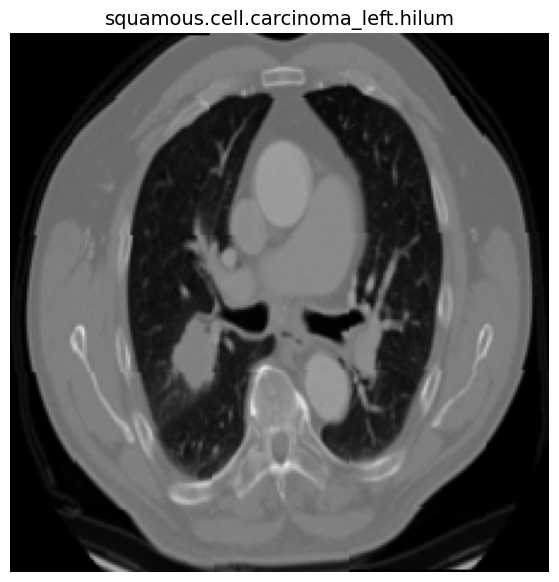

In [15]:
import random 
from PIL import Image
import matplotlib.pyplot as plt
random_idx = torch.randint(0, len(train_data), size=(1,)).item()
img, label = train_data[random_idx][0], train_data[random_idx][1]


img_permute = img.permute(1, 2, 0)
print(f"Image permute: {img_permute.shape} ")
plt.figure(figsize=(12, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [16]:

BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x782304a63850>,
 <torch.utils.data.dataloader.DataLoader at 0x782304a62a70>)

# Build  Model


In [17]:
resnet18_model.fc = nn.Sequential (
    nn.Linear(512,512),
    nn.Dropout(0.2),
     nn.Linear(512,256),
    nn.Linear(256,len(class_names)), # -> len(labels) labels according to labels
)
resnet18_model.fc

Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): Dropout(p=0.2, inplace=False)
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): Linear(in_features=256, out_features=4, bias=True)
)

In [18]:
resnet18_model.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


In [19]:
from torch.optim import lr_scheduler
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18_model.parameters(), lr=0.01)
optimizer = torch.optim.SGD(resnet18_model.parameters(), lr=0.01, momentum=0.9)


In [20]:
from torchinfo import summary
summary(resnet18_model, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 4]                    --
├─Conv2d: 1-1                            [1, 64, 32, 32]           9,408
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─ReLU: 1-3                              [1, 64, 32, 32]           --
├─MaxPool2d: 1-4                         [1, 64, 16, 16]           --
├─Sequential: 1-5                        [1, 64, 16, 16]           --
│    └─BasicBlock: 2-1                   [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-1                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-3                    [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-4                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-6                    [1, 64, 16, 16]           --
│

# Train Step

In [21]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X) 


    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

  
    optimizer.zero_grad()

    
    loss.backward()

  
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  
  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader) 
  return train_loss, train_acc 

In [22]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  model.eval()

  test_loss, test_acc = 0,  0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader): 
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X)

     
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

    
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [23]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5, 
          device=device):
  
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
  
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  
  return results

In [24]:

NUM_EPOCHS = 15


# Start the timer
from timeit import default_timer as timer
start_time = timer() 

model_0_results = train(model=resnet18_model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.0306 | Train acc: 0.5241 | Test loss: 1.6158 | Test acc: 0.3051
Epoch: 1 | Train loss: 0.7199 | Train acc: 0.6900 | Test loss: 1.5110 | Test acc: 0.4387
Epoch: 2 | Train loss: 0.4305 | Train acc: 0.8353 | Test loss: 2.5269 | Test acc: 0.3475
Epoch: 3 | Train loss: 0.5023 | Train acc: 0.8175 | Test loss: 0.6774 | Test acc: 0.6751
Epoch: 4 | Train loss: 0.5010 | Train acc: 0.8091 | Test loss: 0.7006 | Test acc: 0.7374
Epoch: 5 | Train loss: 0.3014 | Train acc: 0.8931 | Test loss: 0.6115 | Test acc: 0.7843
Epoch: 6 | Train loss: 0.2653 | Train acc: 0.9141 | Test loss: 0.7654 | Test acc: 0.7464
Epoch: 7 | Train loss: 0.2271 | Train acc: 0.9144 | Test loss: 1.1187 | Test acc: 0.6451
Epoch: 8 | Train loss: 0.2204 | Train acc: 0.9244 | Test loss: 0.4051 | Test acc: 0.8491
Epoch: 9 | Train loss: 0.2266 | Train acc: 0.9238 | Test loss: 2.4265 | Test acc: 0.5558
Epoch: 10 | Train loss: 0.4186 | Train acc: 0.8766 | Test loss: 1.6881 | Test acc: 0.4782
Epoch: 11 | Train lo

## Saving Model

In [25]:
torch.save(resnet18_model.state_dict(), "chest-ctscan_model.pth")


In [38]:
import torch
from torchvision import transforms
from PIL import Image
from torchvision import models
resnet18_model = models.resnet18(pretrained=False)

# Adjust the final layer if your task has a different number of output classes
num_classes = 4  # Example: set this to the number of classes in your dataset
resnet18_model.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet18_model.fc = nn.Sequential (
    nn.Linear(512,512),
    nn.Dropout(0.2),
     nn.Linear(512,256),
    nn.Linear(256,num_classes), # -> len(labels) labels according to labels
)
# Load the saved model weights
resnet18_model.load_state_dict(torch.load("chest-ctscan_model.pth"))
resnet18_model.to("cpu")
resnet18_model.eval()

# Define the prediction function
def predict_image(image_path, model, transform, device=device):
    # Open the image
    image = Image.open(image_path).convert("RGB")  # Convert image to RGB (3 channels)

    # Apply transformations
    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Move the image tensor to the device
    image = image.to(device)

    # Make predictions
    with torch.inference_mode():
        outputs = model(image)
        predicted_class = outputs.argmax(dim=1).item()  # Get the predicted class index
    
    return predicted_class

# Define the data transformation
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
])

# Example usage
image_path = "/kaggle/input/chest-ctscan-images/Data/test/squamous.cell.carcinoma/000117 (2).png"
predicted_class = predict_image(image_path, resnet18_model, data_transform, "cpu")
print(f"Predicted Class: {class_names[predicted_class]}")


/tmp/ipykernel_35/885080998.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet18_model.load_state_dict(torch.load("chest-ctscan_model.pth"))
/tmp/ipykernel_35/88508

Predicted Class: squamous.cell.carcinoma_left.hilum
